In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


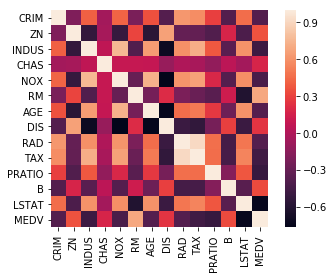

In [5]:
import seaborn as sns

#sns.set(font_scale=1.5)
hm = sns.heatmap(boston.corr(),
                 cbar=True, #disegna una barra con l'intensità del colore
                 square=True, #forza le caselle a una dimensione quadrata
                 yticklabels=boston.columns, #labels per i valori sull'asse Y
                 xticklabels=boston.columns) #labels per i valori sull'asse X
plt.show()

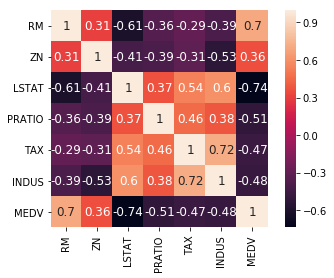

In [6]:
import seaborn as sns

cols=['RM',"ZN","LSTAT","PRATIO","TAX","INDUS","MEDV"]

hm = sns.heatmap(boston[cols].corr(),
                 cbar=True,
                 square=True,
                 yticklabels=boston[cols].columns,
                 xticklabels=boston[cols].columns,
                 annot=True,                          #Questo ci mostra i valori degli indici
                 annot_kws={'size':12})               #Impostiamo la dimensione dell'annotazione a 12 per farla entrare dentro il quadrato

plt.show()

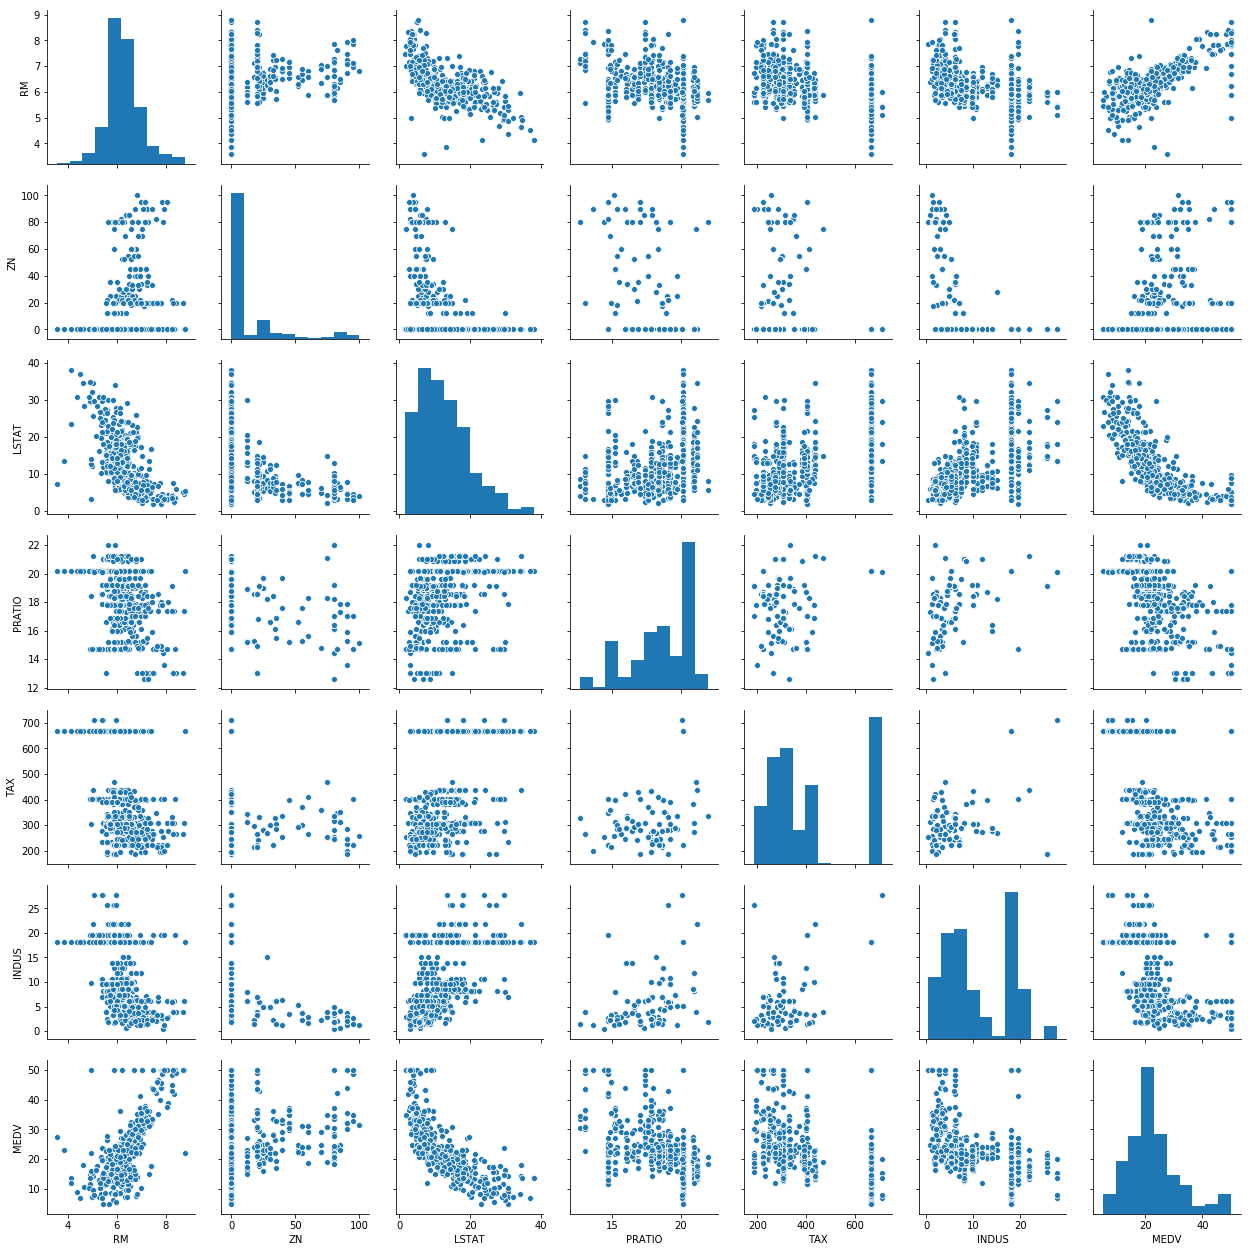

In [7]:
sns.pairplot(boston[cols])

In [8]:
X = boston[["RM","LSTAT"]].values
Y = boston["MEDV"].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 32.72507169281496
R2 score: 0.6069792285352371


In [9]:
from sklearn.preprocessing import StandardScaler

X = boston.drop("MEDV", axis=1).values
Y = boston["MEDV"].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [10]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [11]:
ll = LinearRegression()
ll.fit(X_train_std, Y_train)
Y_pred = ll.predict(X_test_std)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 27.195965766883205
R2 score: 0.6733825506400195


In [12]:
weights = pd.DataFrame(data=list(zip(boston.columns, ll.coef_)), columns=['feature', 'weight'])
weights

,feature,weight
0,CRIM,-1.011901
1,ZN,1.050280
2,INDUS,0.079210
3,CHAS,0.618962
4,NOX,-1.873691
5,RM,2.705270
6,AGE,-0.279573
7,DIS,-3.097665
8,RAD,2.096900
9,TAX,-1.886063
